# Midterm Project

## Classification Analysis
## Author: Brenda Fuemmeler
## Date: November 7, 2025
## Objective: Demonstrate how to apply different classification models to use them for decision-making.

# Introduction
This project will show how we use the Banknote Authentication dataset to build and evaluate classification models.  We can then compare model performance and describe the effectiveness of each for predicting whether a banknote is authentic based on wavelet-transformed images.

## Imports

In [58]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Section 1. Import and Inspect the data

## 1.1 Load the dataset and display the first 10 rows
Load the banknote dataset directly from the seaborn library for consistency and simplicity

Example code:

df = pd.read_csv("banknote.txt", sep="\t", header=None)

df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

print(df.head())

In [12]:
# Load the data
import pandas as pd

df = pd.read_csv("banknote.txt", header=None, sep=",")

df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

print(df.head(10))

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0


## 1.2 Check for missing values and display summary statistics
df.isnull().values.any()    (True = missing values, False = no missing values)

df.describe()     Shows count, mean, std dev, min/max, 25%, 50% & 75% percentiles

In [13]:
# Check for missing values
df.isnull().values.any()

np.False_

In [14]:
# Display summary statistics
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Reflection 1
What do you notice about the dataset? 
The class column (0=genuine, 1=forged) has a mean of .44. This tells us that the models won't be strongly biased toward one class. The other columns show so wider variations, which means we may find skewed data or outliers. 

Are there any data issues? 
Possible issue with the scale of the features. Looking at Standard Deviation (std), there are large variances. We may want to standardize the data before running models.

# Section 2- Data Exploration and Preparation
## 2.1 Explore data patterns and distributions
Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

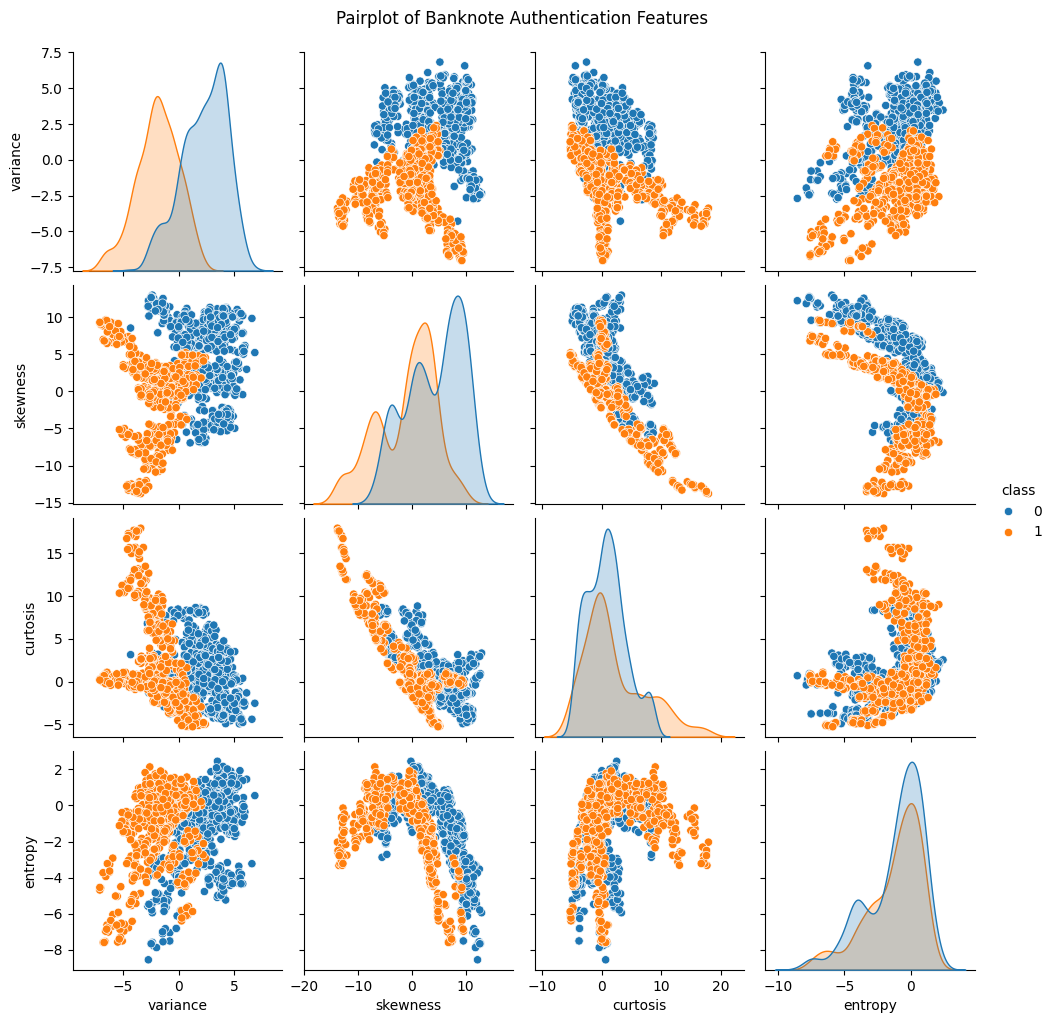

In [16]:
# Scatterplot - use to see relationships and which combinations best separate genuine vs forged notes
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="class", diag_kind="kde")
plt.suptitle("Pairplot of Banknote Authentication Features", y=1.02)
plt.show()

# Notes on Scatterplot
- look for clusters 
- variance vs skewness shows good separation
- variance vs curtosis shows good separation
- distinct clusters of orange vs blue are indicators of powerful predictors

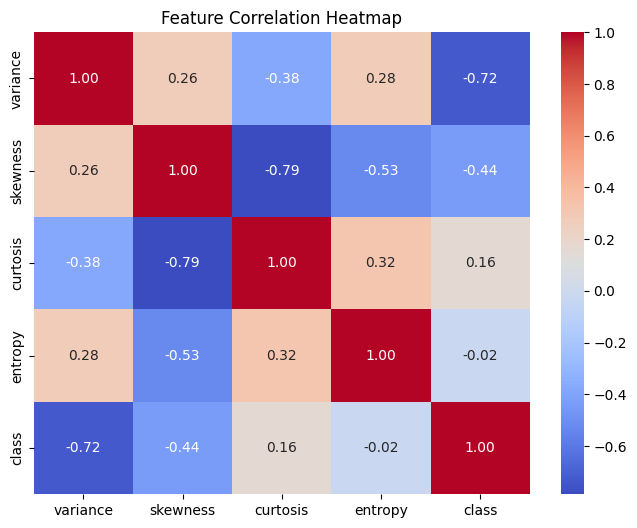

In [17]:
# Correlation Heatmap - to find features that are related and therefore considered redundant
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Notes on Correlation Heatmap
- Values close to #-1 = strong correlation
- Supports the theory that variance vs class is highly predictive of whether a banknote is genuine or forged.
- When variance decreases, the liklihood of being a forged note (class =1) decreases.

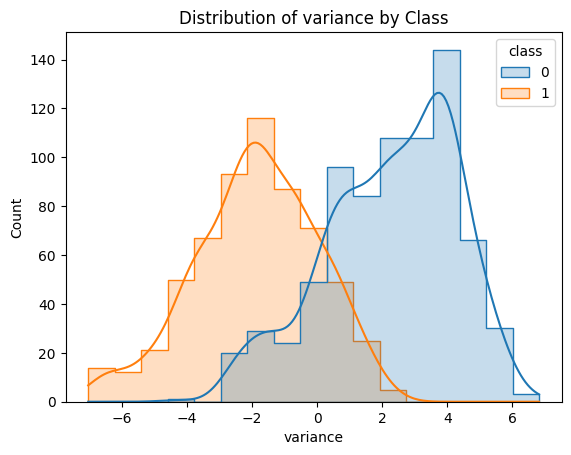

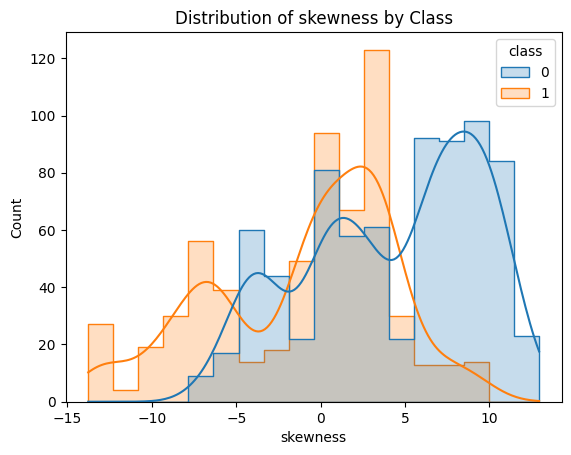

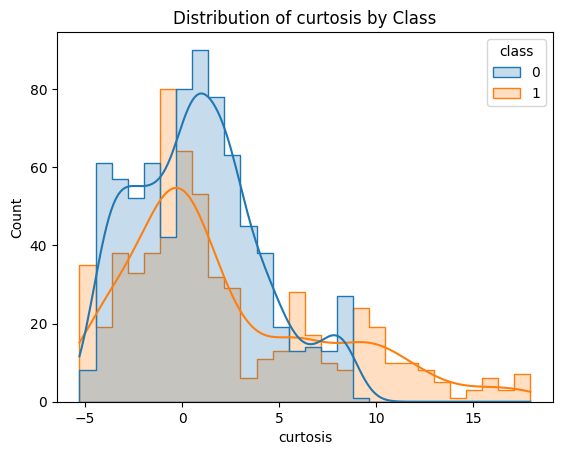

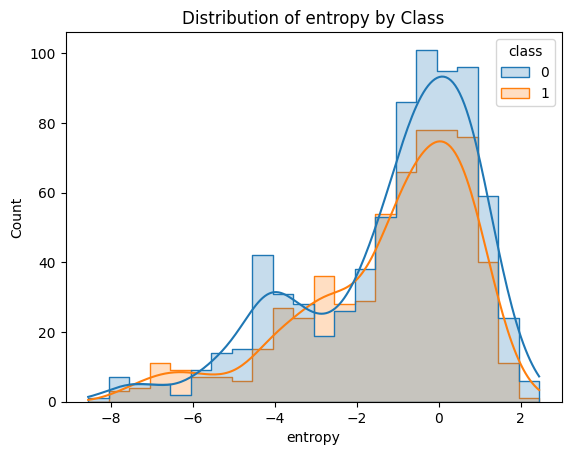

In [18]:
# Histogram- to see the distribution of each feature by class
# Will help identify if features are normally distributed, skewed or have outliers
for col in ["variance", "skewness", "curtosis", "entropy"]:
    sns.histplot(data=df, x=col, hue="class", kde=True, element="step")
    plt.title(f"Distribution of {col} by Class")
    plt.show()

# Notes for Histogram
- Overlapping curves means less separation power
- Distinct peaks indicate a strong feature for classification

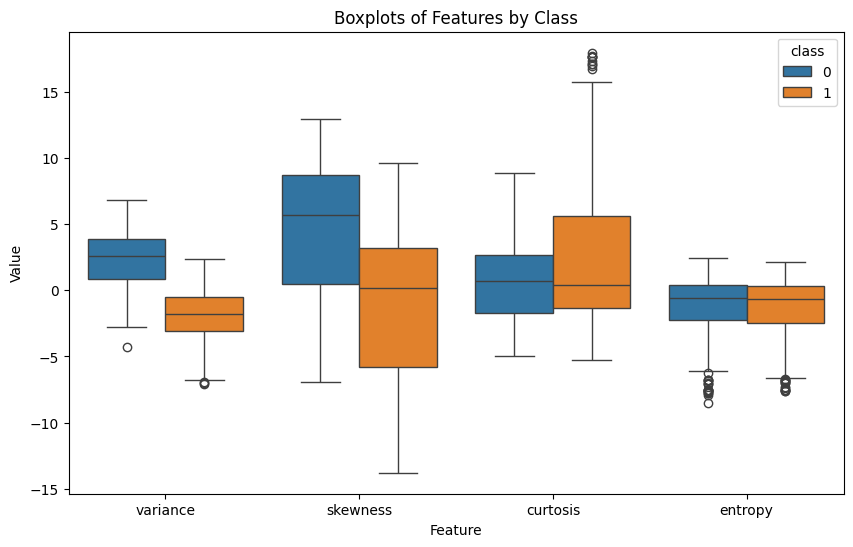

In [19]:
# Boxplot - to compare class-wise distributions and spot outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df.melt(id_vars="class", var_name="Feature", value_name="Value"),
            x="Feature", y="Value", hue="class")
plt.title("Boxplots of Features by Class")
plt.show()

# Notes for Boxplot
- Skewness has no outliers
- Variance, curtosis and entropy all have outliers, but variance has the fewest

## 2.2 Handle missing values and clean data
- There are no missing values to impute
- No need to remove outliers as they are not extreme and removing them may decrease the performance of the model
- No need to convert any categorical values to numeric

## 2.3 Feature selection and engineering
Create new features- no need
Transform or combine existing features to improve model performance- no need
Scale or normalize data- if SVM, KNN or logistic regression will be used, I will want to do Scaling to standardize my features

## Reflection 2
What patterns or anomalies do you see? Strong correlation with variance and skewness. Entropy provided least amount of influence for modeling.

Do any features stand out? Variance and Skewness stand out as best features to use

What preprocessing steps were necessary to clean and improve the data? None

Did you create or modify any features to improve performance? I decided to Scale so I will be able to use SVM, KNN or logistic regression models. If I were to use a Decision Tree, scaling would not be necessary.

# Section 3- Feature Selection and Justification
## 3.1 Choose features and target
- Select two or more input features (variance, skewness)
- Select a target variable
  - Classification: Categorical target variable is class (0 or 1)
- Justify the selection with reasoning
  - There are only two possible outcomes in predicting whether a banknote is genuine or forged.

## 3.2 Define X (features) and y (target)
- Assign input features to X
- Assign target variable to y 

In [21]:
# Define features (independent variables)
X = df[['variance', 'skewness', 'curtosis', 'entropy']]

# Define target (dependent variable)
y = df['class']

In [22]:
# Verify the target
print(y.value_counts())

class
0    762
1    610
Name: count, dtype: int64


## Reflection 3:
Why did you choose these features? 
Defining x with variance, skewness, curtosis and entropy give us all data needed for engineering and modeling.

How might they impact predictions or accuracy? 
While some features will give us better predictions and accuracy, we don't find that any of them will be useless. 

# Section 4. Train a Classification Model (Decision Tree, Random Forest, Logistic Regression)
## 4.1 Split and Scale the Data
Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
Scaling will allow more modeling.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2️⃣ Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test)        # Apply same transformation

In [24]:
# Check samples
print(X_train_scaled[:5])

[[-2.54657153  0.87109727 -0.15793343 -3.04857247]
 [-0.7627616  -0.55581298  0.14417007  0.82243726]
 [-0.6795926   1.70647426 -0.21800269 -2.76658132]
 [ 1.19202637  0.94425551 -0.73132458  0.63977534]
 [ 0.08251107 -0.25968773  0.19049351  0.80392101]]


## 4.2 Train and Evaluate
# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Initialize the model
log_reg = LogisticRegression(random_state=42)

# 2️⃣ Fit the model
log_reg.fit(X_train_scaled, y_train)

# 3️⃣ Make predictions
y_pred = log_reg.predict(X_test_scaled)

# 4️⃣ Evaluate performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9781553398058253

Confusion Matrix:
 [[220   9]
 [  0 183]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       229
           1       0.95      1.00      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



# Notes
- Accuracy rate of 98% is great. This shows high precision and recall for both classes.

# Decision Boundary
- Variance and Skewness

ModuleNotFoundError: No module named 'contourpy._contourpy'

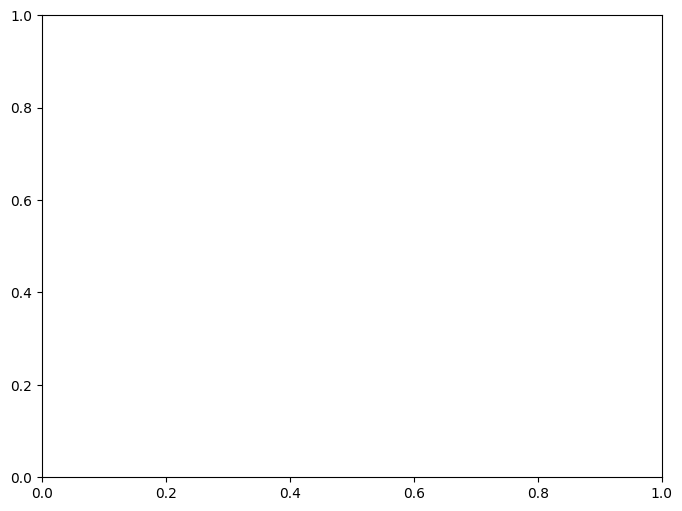

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume X and y are your features and target
# Using only variance and skewness for visualization
X_vis = X[['variance', 'skewness']].values
y_vis = y.values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVM
model = SVC(kernel='linear')  # Linear kernel works well for visualization
model.fit(X_train_scaled, y_train)

# Create a grid to plot decision boundary
xx, yy = np.meshgrid(
    np.linspace(X_train_scaled[:,0].min()-1, X_train_scaled[:,0].max()+1, 500),
    np.linspace(X_train_scaled[:,1].min()-1, X_train_scaled[:,1].max()+1, 500)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Variance (scaled)')
plt.ylabel('Skewness (scaled)')
plt.title('SVM Decision Boundary: Genuine vs Forged Banknotes')
plt.show()


## 4.3 4.3 Evalulate performance, for example:
- Regression: R^2, MAE, RMSE (RMSE has been recently updated)
- Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
- Clustering: Inertia, Silhouette Score

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [73]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [74]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



## 4.4 Report Confusion Matrix (as a heatmap)

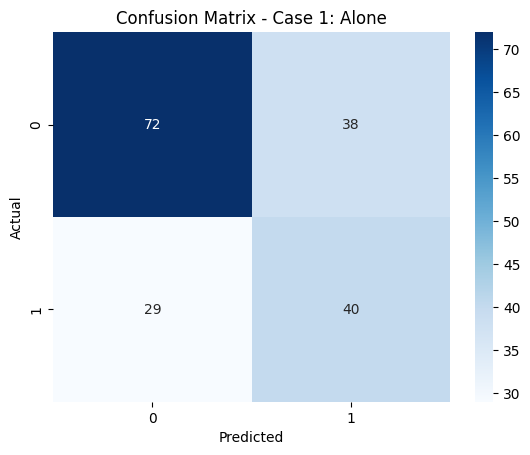

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 1: Alone")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

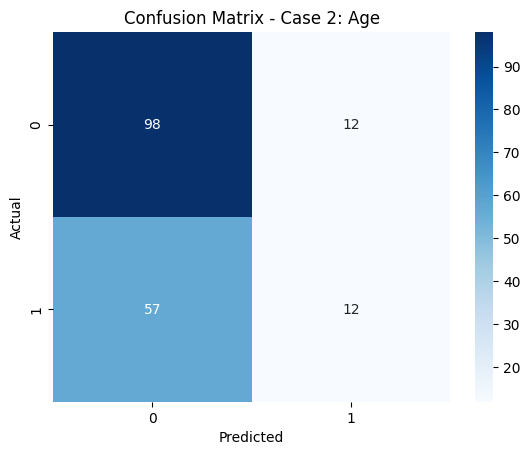

In [76]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 2: Age")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

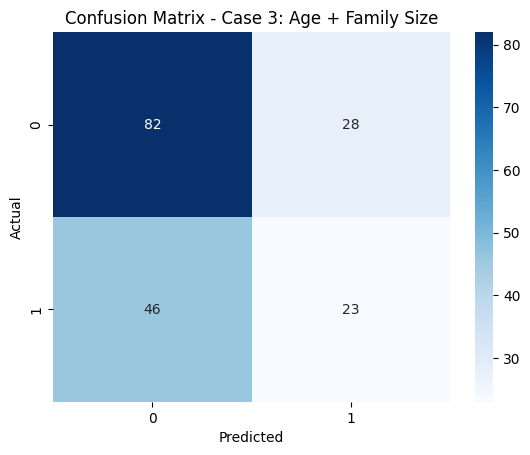

In [77]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 3: Age + Family Size")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 4.5 Report Decision Tree Plot

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

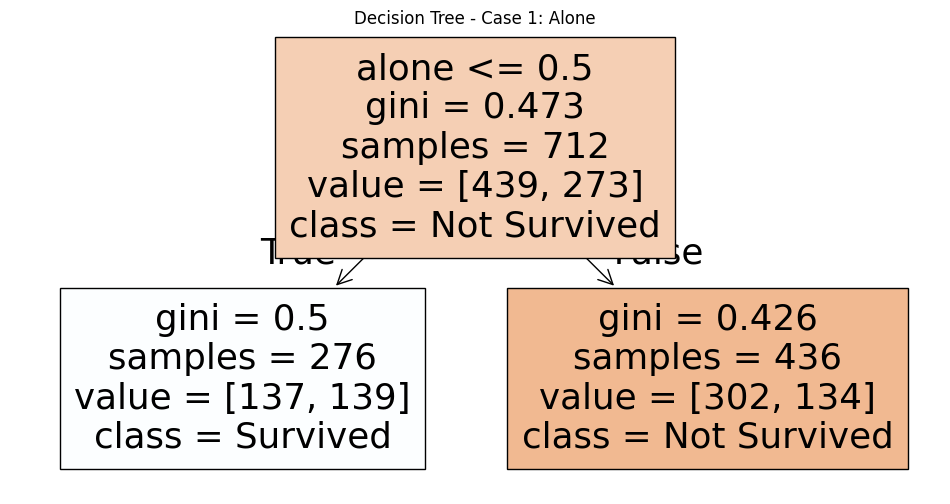

In [79]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=["Not Survived", "Survived"],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")

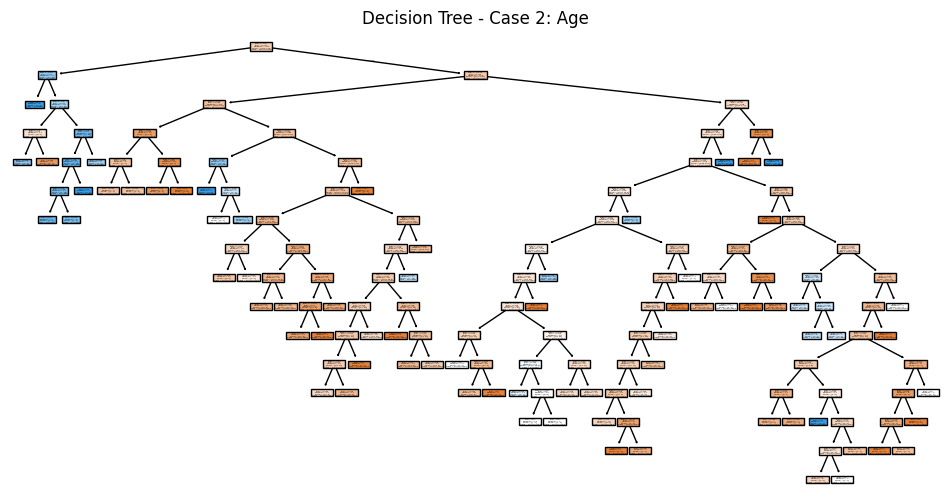

In [80]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=["Not Survived", "Survived"],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

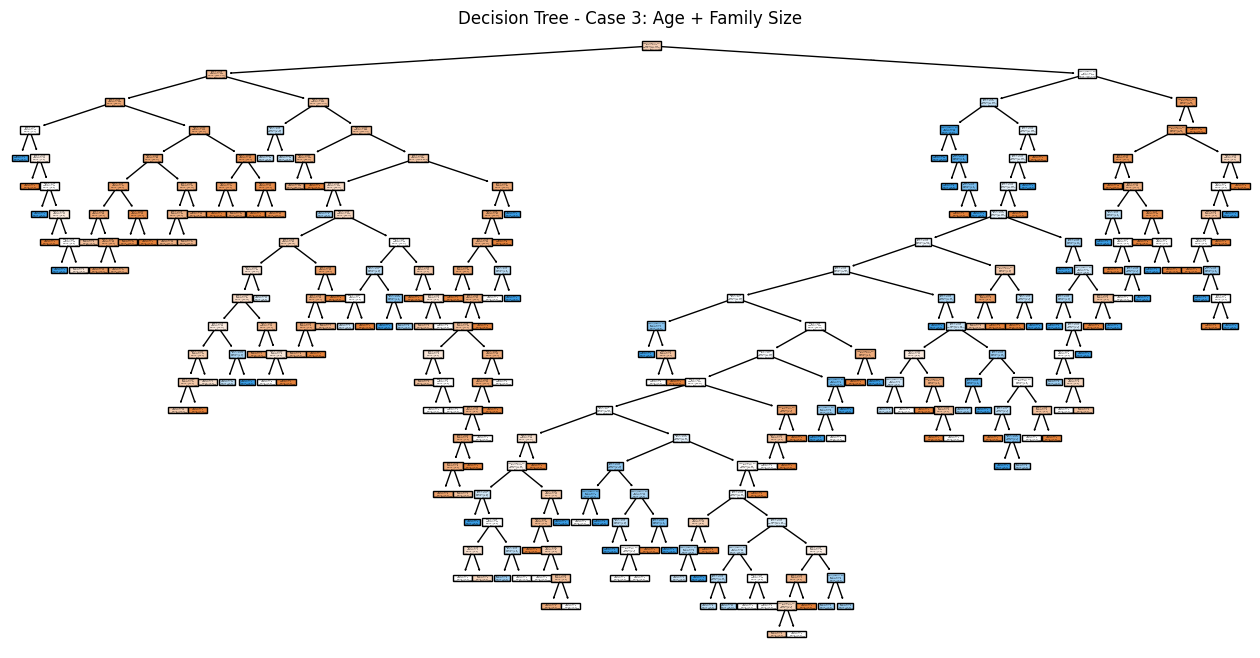

In [81]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=["Not Survived", "Survived"],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

## Reflection 4:
How well did the model perform? 

Any surprises in the results?

# Section 5. Improve the Model or Try Alternates (Implement a Second Option)
## 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

In [82]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel="rbf")
# svc_model.fit(X_train, y_train)

# Linear Kernel
# svc_model = SVC(kernel="linear")
# svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel="poly", degree=3)
# svc_model.fit(X_train, y_train)

# Sigmoid Kernel
# svc_model = SVC(kernel="sigmoid")
# svc_model.fit(X_train, y_train)

## SVC Kernel: How to Choose

Start with linear if you suspect the data is linearly separable.
Use RBF if the data is complex or you aren’t sure.
Try polynomial if the data seems to follow a curved boundary.
Use sigmoid for experiments (rarely the best choice).
SVC Kernel: Common Issues and Techniques

If the model takes too long to train, reduce the degree for polynomial kernels.
If support_vectors_ gives an error, the data may not be separable with the current kernel. Try switching to RBF or adjusting the C (regularization) value.
If the model misclassifies many points, then increase/decrease gamma or C.

## 5.1 Train and Evaluate Model (SVC)

In [83]:
from sklearn.svm import SVC

In [84]:
# CASE 1: SVC using 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - Alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - Alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [85]:
# CASE 2: SVC using 'age'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 2 - Age):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 2 - Age):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [86]:
# CASE 3: SVC using 'age + family size'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 3 - Age + Family Size):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 3 - Age + Family Size):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



## 5.2 Visualize Support Vectors (1D Case 1 and 2D Case 3)
Use scatter plots to visualize support vectors. 
Step 1) Split the data into two groups:

Survived – Passengers who survived the Titanic sinking (value = 1).
Not Survived – Passengers who did not survive (value = 0).
Step 2) Plot each category using different shapes and colors:

Yellow squares ('s') for survived passengers
Cyan triangles ('^') for non-survived passengers
Step 3) Overlay the support vectors — the critical data points used to define the decision boundary — with black plus signs.

Black pluses ('+') will represent the support vectors.
Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

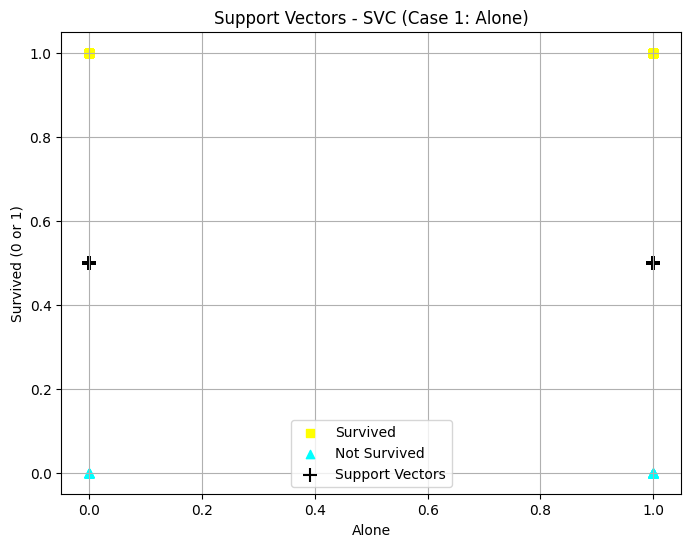

In [87]:
import matplotlib.pyplot as plt # all imports at the top

# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, "alone"]
not_survived_alone = X1_test.loc[y1_test == 0, "alone"]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c="yellow", marker="s", label="Survived")
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c="cyan", marker="^", label="Not Survived")

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, "support_vectors_"):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c="black", marker="+", s=100, label="Support Vectors")

# Add labels and legend
plt.xlabel("Alone")
plt.ylabel("Survived (0 or 1)")
plt.title("Support Vectors - SVC (Case 1: Alone)")
plt.legend()
plt.grid(True)
plt.show()

# Train Case 2 Model 
Using only age feature

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1️⃣ Prepare your data
# Example: assume your Titanic DataFrame is named df
X2 = data_frame[["age"]]        # Features for Case 2
y2 = data_frame["survived"]     # Target variable

# Split into train/test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 2️⃣ Train your SVM (Case 2)
svc_model2 = SVC(kernel="rbf")  # You can change kernel="linear", etc.
svc_model2.fit(X2_train, y2_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


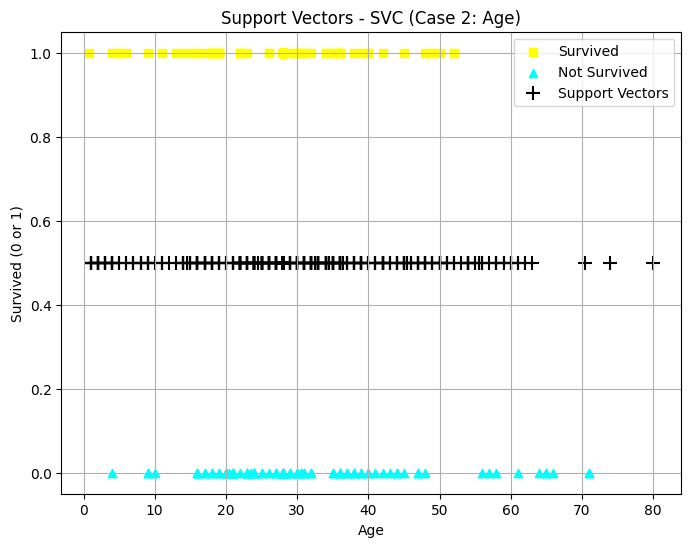

In [89]:
import matplotlib.pyplot as plt

# Create groups based on survival
survived_age = X2_test.loc[y2_test == 1, "age"]
not_survived_age = X2_test.loc[y2_test == 0, "age"]

plt.figure(figsize=(8, 6))
plt.scatter(survived_age, y2_test.loc[y2_test == 1], c="yellow", marker="s", label="Survived")
plt.scatter(not_survived_age, y2_test.loc[y2_test == 0], c="cyan", marker="^", label="Not Survived")

# Overlay support vectors
if hasattr(svc_model2, "support_vectors_"):
    support_x = svc_model2.support_vectors_[:, 0]
    plt.scatter(support_x, [0.5] * len(support_x), c="black", marker="+", s=100, label="Support Vectors")

plt.xlabel("Age")
plt.ylabel("Survived (0 or 1)")
plt.title("Support Vectors - SVC (Case 2: Age)")
plt.legend()
plt.grid(True)
plt.show()

# Train Case 3 Model 
Using age and family size features

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1️⃣ Prepare your data
# Example: assume your Titanic DataFrame is named df
X3 = data_frame[["age", "family_size"]]        # Features for Case 3
y3 = data_frame["survived"]     # Target variable

# Split into train/test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# 2️⃣ Train your SVM (Case 3)
svc_model3 = SVC(kernel="rbf", C=1, gamma="scale")  # you can adjust kernel if you like
svc_model3.fit(X3_train, y3_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


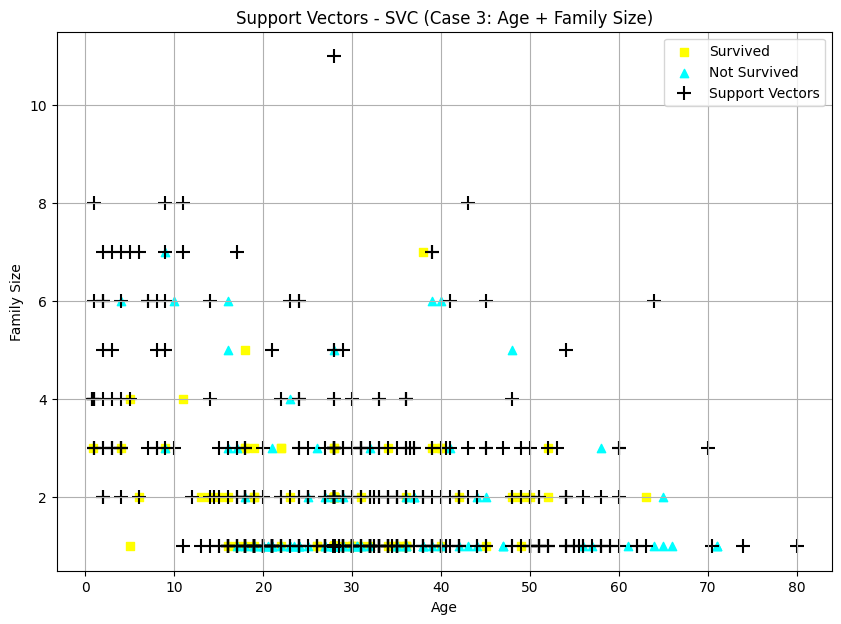

In [91]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived["age"], survived["family_size"],
            c="yellow", marker="s", label="Survived")

# Plot not survived (cyan triangles)
plt.scatter(not_survived["age"], not_survived["family_size"],
            c="cyan", marker="^", label="Not Survived")

# Overlay support vectors
if hasattr(svc_model3, "support_vectors_"):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c="black", marker="+", s=100, label="Support Vectors")

# Add labels, title, and legend
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Support Vectors - SVC (Case 3: Age + Family Size)")
plt.legend()
plt.grid(True)
plt.show()

## 5.3 Train and Evaluate Model (Neural Network on Case 3)

In [92]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

In [93]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [94]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       105
           1       0.70      0.35      0.47        74

    accuracy                           0.67       179
   macro avg       0.68      0.62      0.61       179
weighted avg       0.68      0.67      0.64       179



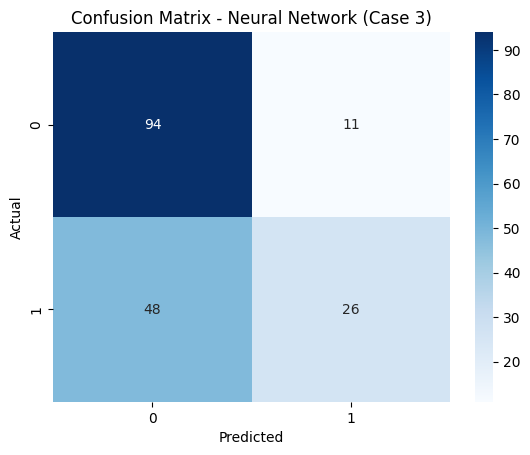

In [95]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Neural Network (Case 3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 5.4 Visualize (Neural Network on Case 3)
Visualize the learned decision boundary of the neural network; how it separates the two target classes into survived and not-survived. Use age and family size to create a 2D plot showing how the model predicts across different combinations of these features.

c:\Repos\applied-ml-fuemmeler\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


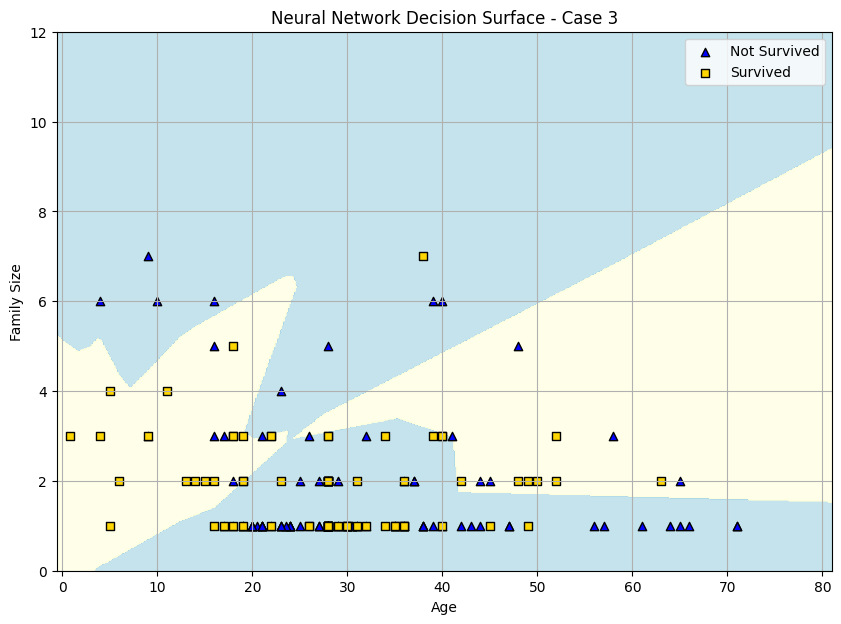

In [96]:
# imports at the top (only once each, organized)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Get the range of our two features - use padding to enhance appearance

padding = 1
x_min, x_max = X3["age"].min() - padding, X3["age"].max() + padding
y_min, y_max = X3["family_size"].min() - padding, X3["family_size"].max() + padding

# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))

# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(["lightblue", "lightyellow"])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

# Overlay the actual test data points for visual comparison

# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X3_test["age"][y3_test == 0],
            X3_test["family_size"][y3_test == 0],
            c="blue", marker="^", edgecolor="k", label="Not Survived")

# Plot passengers who DID survive (1) as gold squares
plt.scatter(X3_test["age"][y3_test == 1],
            X3_test["family_size"][y3_test == 1],
            c="gold", marker="s", edgecolor="k", label="Survived")

# Add axis labels, title, legend, and grid
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Neural Network Decision Surface - Case 3")
plt.legend()
plt.grid(True)
plt.show()

## Reflection 5:
- Which model performed better? 
- Why might one classifier be more effective in this specific case?

### Section 6. Final Thoughts & Insights

6.1 Summarize findings.
6.2 Discuss challenges faced.
6.3 If you had more time, what would you try next?
Reflection 6: What did you learn from this project?

## Markdown code for generic classification project

| Model Type           | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------          |------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree 	   | Case 1 | alone | 63% | 64% | 63% | 63% | 
|                      | Case 2 | age | 61% | 58% | 61% | 55% |
|                      | Case 3 | age + family_size | 60% | 57% | 59% | 57% | 
| Neural Network (MLP) | Case 1 | alone | xx.xx% | xx.xx% | xx.xx% | xx.xx% |
|                      | Case 2 | age | xx.xx% | xx.xx% | xx.xx% | xx.xx% |
|                      | Case 3 | age + family_size | 67% | 68% | 67% | 64% |
